# OS Programming Assignment: Round Robin Scheduler

### importing libraries
In this section we will import the necessary libraries for our project.

In [59]:
import operator
import time
from collections import deque
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")
counter = 1

## CSV generator: create new inputs from here
In this section you can enter your processes, so we can generate a csv file for you to use.

In [35]:
processes = []
storage = []

number_of_processes = eval(input("enter the number of processes"))

for i in range(number_of_processes):
    name = input("name of processes: ")
    entry_time = eval(input("entry time: "))
    burst_time = eval(input("burst time: "))
    processes.append([name, entry_time, burst_time])

quantum=eval(input("enter quantum: "))
print("number of processes: {}".format(number_of_processes))
storage=pd.DataFrame(processes)
storage=storage.rename(columns={0:'name',1:'entry_time',2:'burst_time'})
display(storage)
storage.to_csv(r'./input{}.csv'.format(counter), index=False)
counter += 1

number of processes: 4


,name,entry_time,burst_time
0,p1,0,4
1,p2,0,1
2,p3,0,8
3,p4,0,1


## Load from CSV file:
In this section you can load the saved csv files

In [69]:
option = eval(input("Do you want to load 1 specific file or multiple files at once? 1. specific 2. Multiple "))
storage = []
size = []

if option == 1:
    file_num = eval(input("enter file's number:"))
    storage=pd.read_csv('./input{}.csv'.format(file_num))
    if len(storage) == 0:
        print("file does not exist!")
    number_of_processes = len(storage)
    quantum = eval(input("enter quantum:"))
    print(storage)
    print('quantum: ',quantum)

if option == 2:
    file_num = eval(input("how many file do you want to read?"))
    [storage.append(pd.read_csv('./input{}.csv'.format(i))) for i in range(file_num)]
    if len(storage) != file_num:
        print("files weren't read properly, try again")
    [size.append(len(storage[i])) for i in range(file_num)]
    quantum=eval(input("enter quantum:"))
    display(storage)
    print(size)

[  name  entry_time  burst_time
 0   p1           0          10
 1   p2           3           6
 2   p3           3           4
 3   p4           8           3
 4   p5          13           5,
   name  entry_time  burst_time
 0   p1           0           5
 1   p2           1           3
 2   p3           2           1
 3   p4           3           2
 4   p5           4           3,
   name  entry_time  burst_time
 0   p1           0           4
 1   p2           1           5
 2   p3           2           2
 3   p4           3           1
 4   p5           4           6
 5   p6           6           3,
   name  entry_time  burst_time
 0   p1           5           5
 1   p2           4           6
 2   p3           3           7
 3   p4           0           9
 4   p5           2           2
 5   p6           6           3,
   name  entry_time  burst_time
 0   p1           0           4
 1   p2           0           1
 2   p3           0           8
 3   p4           0           1]

[5, 5, 6, 6, 4]


## Pre Processor:


In [70]:
processes = []
[storage[i].sort_values(by='entry_time',inplace=True) for i in range(len(storage))]
display(storage)


[  name  entry_time  burst_time
 0   p1           0          10
 1   p2           3           6
 2   p3           3           4
 3   p4           8           3
 4   p5          13           5,
   name  entry_time  burst_time
 0   p1           0           5
 1   p2           1           3
 2   p3           2           1
 3   p4           3           2
 4   p5           4           3,
   name  entry_time  burst_time
 0   p1           0           4
 1   p2           1           5
 2   p3           2           2
 3   p4           3           1
 4   p5           4           6
 5   p6           6           3,
   name  entry_time  burst_time
 3   p4           0           9
 4   p5           2           2
 2   p3           3           7
 1   p2           4           6
 0   p1           5           5
 5   p6           6           3,
   name  entry_time  burst_time
 0   p1           0           4
 1   p2           0           1
 2   p3           0           8
 3   p4           0           1]

## Main code:

In [80]:

class RoundRobin:
    def __init__(self):
        self.waiting_queue = deque()
        self.gantt_chart = []
        self.elapsed_time = 0.0
        self.processes = []

    def round_robin(self, pro):
        elapsed_time = 0.0
        self.processes = pro.values.tolist()
        processes_backup=deepcopy(self.processes)
        time_table=[]
        exit_table=[]
        while True:
            self.check_time()
            if len(self.waiting_queue) == 0:
                break
            ready_proc = self.waiting_queue.popleft()
            self.gantt_chart.append(ready_proc)
            time_table.append(self.elapsed_time)
            if ready_proc[2] > 0:
                if ready_proc[2] > quantum:
                    self.tick(quantum)
                    ready_proc[2] -= quantum
                    self.waiting_queue.append(ready_proc)
                else:
                    self.tick(ready_proc[2])
                    ready_proc[2] = 0
                exit_table.append(self.elapsed_time)

        self.gantt_chart=pd.DataFrame(self.gantt_chart)

        self.gantt_chart=self.gantt_chart.rename(columns={0:'order of processes',1:'entry_time',2:'burst_time',3:'enter time',4:'exit time',5:'duration'})
        self.gantt_chart.drop(columns=['entry_time','burst_time'],inplace=True)
        self.gantt_chart["enter time"]=time_table
        self.gantt_chart['exit time']=exit_table
        self.gantt_chart['duration']=list(map(operator.sub,exit_table,time_table))
        display(self.gantt_chart)
        gantt_storage.append(self.gantt_chart)
        print("elapsed time :{} ".format(self.elapsed_time))
        print("Quant size :{} ".format(quantum))
        print("Waiting Time :{} ".format(self.waiting_time_calc(processes_backup)))

    def check_time(self):
        for row in range(len(self.processes)):
            if self.elapsed_time >= self.processes[row][1]:
                if self.processes[row][1] >= 0:
                    self.waiting_queue.append(self.processes[row])
                    self.processes[row][1] = -1

    def tick(self, sec):
        for t in range(sec):
            self.elapsed_time += 1
            self.check_time()


    def waiting_time_calc(self, processes_backup):
        g_table = self.gantt_chart.values.tolist()
        g_table.sort(reverse = True, key = lambda x: x[2])
        last_list = []
        up_side = 0.0
        for proc in processes_backup:
            for item in g_table:
                if item[0] == proc[0]:
                    last_list.append(item[2])
                    break
        for proc in range(len(processes_backup)):
            up_side += (last_list[proc] - processes_backup[proc][2] - processes_backup[proc][1])
        waiting_time = up_side / number_of_processes
        return waiting_time


## Code Controller
In this section we control the code and give it our data sets to calculate and plot.

In [85]:
gantt_storage = []
for item in range(len(storage)):
    number_of_processes = len(storage[item])
    display(storage[item])
    RoundRobin().round_robin(storage[item])

,name,entry_time,burst_time
0,p1,0,10
1,p2,3,6
2,p3,3,4
3,p4,8,3
4,p5,13,5


,order of processes,enter time,exit time,duration
0,p1,0.0,4.0,4.0
1,p2,4.0,8.0,4.0
2,p3,8.0,12.0,4.0
3,p1,12.0,16.0,4.0
4,p4,16.0,19.0,3.0
5,p2,19.0,21.0,2.0
6,p5,21.0,25.0,4.0
7,p1,25.0,27.0,2.0
8,p5,27.0,28.0,1.0


elapsed time :28.0 
Quant size :4 
Waiting Time :10.4 


,name,entry_time,burst_time
0,p1,0,5
1,p2,1,3
2,p3,2,1
3,p4,3,2
4,p5,4,3


,order of processes,enter time,exit time,duration
0,p1,0.0,4.0,4.0
1,p2,4.0,7.0,3.0
2,p3,7.0,8.0,1.0
3,p4,8.0,10.0,2.0
4,p5,10.0,13.0,3.0
5,p1,13.0,14.0,1.0


elapsed time :14.0 
Quant size :4 
Waiting Time :5.6 


,name,entry_time,burst_time
0,p1,0,4
1,p2,1,5
2,p3,2,2
3,p4,3,1
4,p5,4,6
5,p6,6,3


,order of processes,enter time,exit time,duration
0,p1,0.0,4.0,4.0
1,p2,4.0,8.0,4.0
2,p3,8.0,10.0,2.0
3,p4,10.0,11.0,1.0
4,p5,11.0,15.0,4.0
5,p6,15.0,18.0,3.0
6,p2,18.0,19.0,1.0
7,p5,19.0,21.0,2.0


elapsed time :21.0 
Quant size :4 
Waiting Time :7.666666666666667 


,name,entry_time,burst_time
3,p4,0,9
4,p5,2,2
2,p3,3,7
1,p2,4,6
0,p1,5,5
5,p6,6,3


,order of processes,enter time,exit time,duration
0,p4,0.0,4.0,4.0
1,p5,4.0,6.0,2.0
2,p3,6.0,10.0,4.0
3,p2,10.0,14.0,4.0
4,p4,14.0,18.0,4.0
5,p1,18.0,22.0,4.0
6,p6,22.0,25.0,3.0
7,p3,25.0,28.0,3.0
8,p2,28.0,30.0,2.0
9,p4,30.0,31.0,1.0


elapsed time :32.0 
Quant size :4 
Waiting Time :16.666666666666668 


,name,entry_time,burst_time
0,p1,0,4
1,p2,0,1
2,p3,0,8
3,p4,0,1


,order of processes,enter time,exit time,duration
0,p1,0.0,4.0,4.0
1,p2,4.0,5.0,1.0
2,p3,5.0,9.0,4.0
3,p4,9.0,10.0,1.0
4,p3,10.0,14.0,4.0


elapsed time :14.0 
Quant size :4 
Waiting Time :4.75 


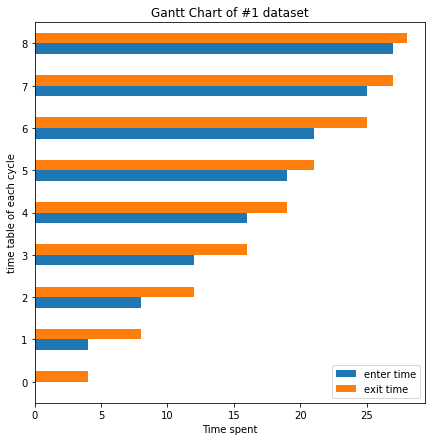

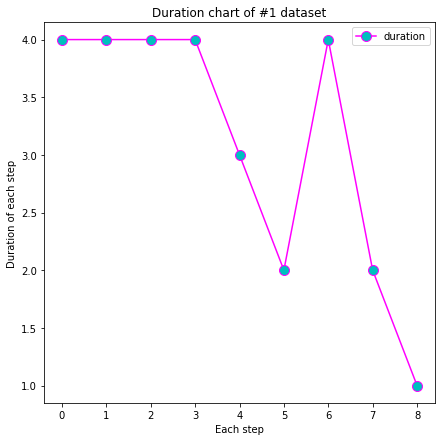

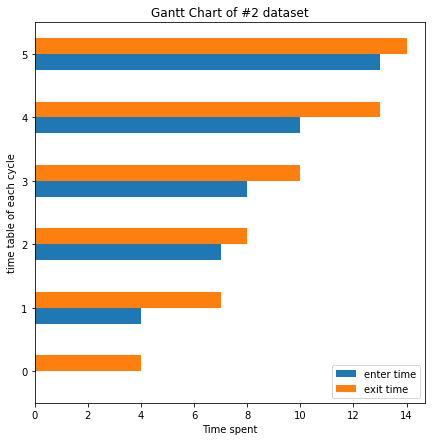

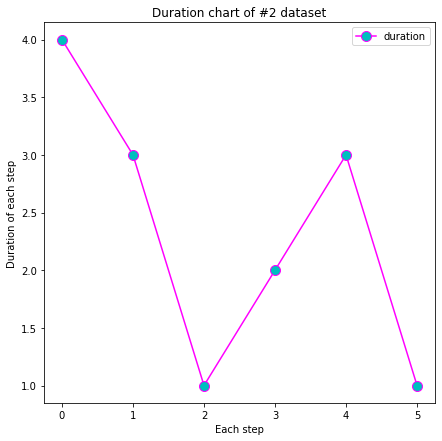

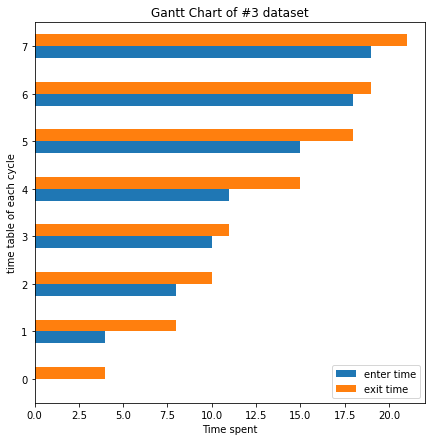

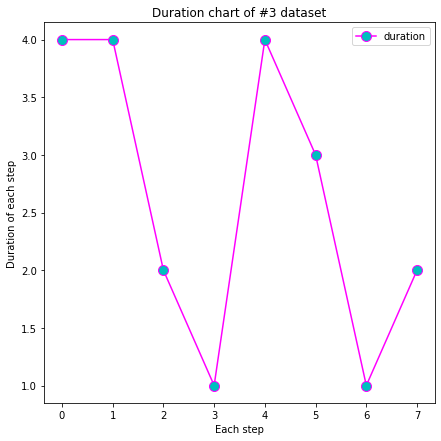

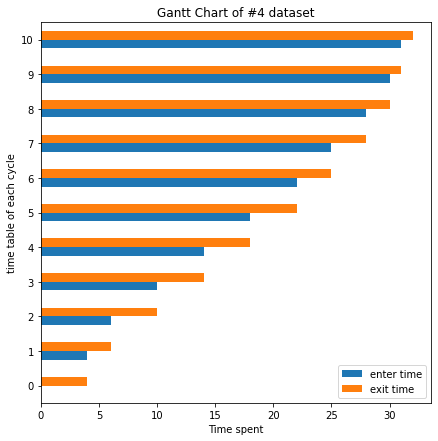

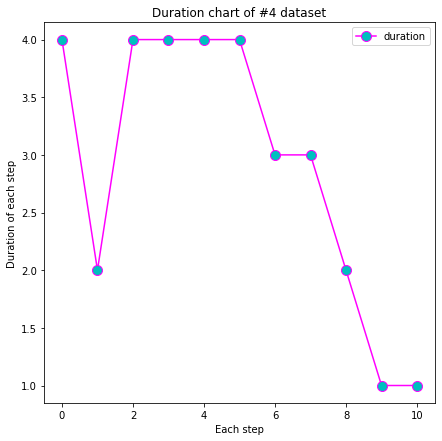

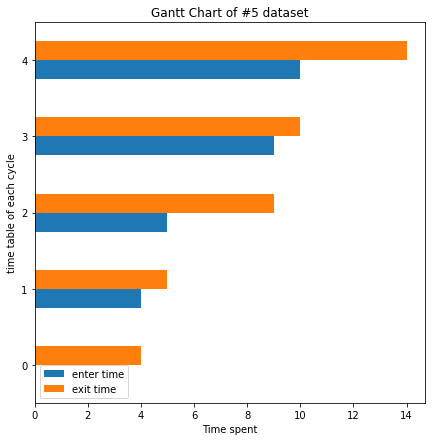

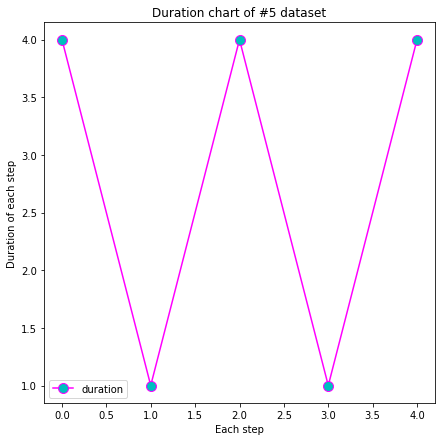

In [102]:
for i in range(len(gantt_storage)):
    gantt_storage[i].plot.barh(y=['enter time', 'exit time'], figsize=(7,7))
    plt.title("Gantt Chart of #{} dataset".format(i+1))
    plt.xlabel("Time spent")
    plt.ylabel("time table of each cycle")
    gantt_storage[i].plot(y="duration", figsize=(7,7), color='magenta', linestyle='solid', marker='o',
     markerfacecolor='c', markersize=10)
    plt.title("Duration chart of #{} dataset".format(i+1))
    plt.xlabel("Each step")
    plt.ylabel("Duration of each step")